# Model for Nature Conservancy Fisheries Kaggle Competition

#### Dependencies

In [1]:
import fish_data as fd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import json

#### Helper functions

In [2]:
help(fd)

Help on module fish_data:

NAME
    fish_data

DESCRIPTION
    fish_data module contains the helper functions for the model build of the
    Nature Conservancy Fisheries Kaggle Competition.
    
    Dependencies:
        * numpy as np
        * os
        * scipy.ndimage as ndimage
        * scipy.misc as misc
        * scipy.special as special
        * matplotlib.pyplot as plt
        * tensorflow as tf

FUNCTIONS
    count_nodes(x, y, kernel, stride, conv_depth, pad='SAME')
        Calculates the number of total nodes present in the next layer of a
        convolution OR max_pooling event.
    
    decode_image(image_name, size, num_channels=3, mean_channel_vals=[155.0, 155.0, 155.0], mutate=False, crop='random', crop_size=224)
        Converts a dequeued image read from filename to a single tensor array,
        with modifications:
            * smallest dimension resized to standard height and width supplied in size param
            * each channel centered to mean near zero.  Dev

#### Generate a list of filenames

In [3]:
fish_filenames = fd.generate_filenames_list('data/train/', subfolders = True)
print("There are {} filenames in the master set list".format(len(fish_filenames)))
test_filenames = fd.generate_filenames_list('data/test_stg1/', subfolders = False)
print("There are {} filenames in the test set list".format(len(test_filenames)))

There are 3777 filenames in the master set list
There are 1000 filenames in the test set list


#### Retrieve Dictionary of image dimensions

In [4]:
with open('dimensions_dict.json') as f:
    dim_dict = json.load(f)
    
print("Training/Valid set filename dimensions downloaded correctly: {}".format(
        dim_dict.get(fish_filenames[0]) == [720, 1280, 3]))
print("Training/Valid set filename dimensions downloaded correctly: {}".format(
        dim_dict.get(test_filenames[0]) == [720, 1280, 3]))

Training/Valid set filename dimensions downloaded correctly: True
Training/Valid set filename dimensions downloaded correctly: True


#### Generate the labels for the master set list

In [5]:
fish_label_arr = fd.make_labels(fish_filenames, 'train/', '/img')
fish_label_arr.shape
print("One label per row entry: {}".format(all(np.sum(fish_label_arr, 1) == 1) ))

One label per row entry: True


#### Shuffle and split the master set list into training and validation sets

In [6]:
valid_size = 300
files_train, files_val, y_train, y_val = train_test_split(fish_filenames, fish_label_arr, test_size = valid_size)
print("Validation set size: {}".format(y_val.shape[0]))
print("Training set size: {}".format(y_train.shape[0]))

Validation set size: 300
Training set size: 3477


#### Generate a files_train list that represents each class of fish equally

In [7]:
"""Need to refactor generate_balanced_filenames to work from this list, not from scratch."""

'Need to refactor generate_balanced_filenames to work from this list, not from scratch.'

In [8]:
train_dims_list = []
for f in files_train :
    train_dims_list.append(dim_dict.get(f))

## Graph and Session Runs

#### Graph parameters

In [9]:
%run -i 'PARAMETERS.py'

Dimensions for each entry: 224x224x3 = 150528
Dimensions after first convolution step (with max pool): 27x27x96 = 69984
Dimensions after second convolution step (with max pool): 13x13x256 = 43264
Dimensions after third convolution step: 13x13x384 = 64896
Dimensions after fourth convolution step: 13x13x384 = 64896
Dimensions after fifth convolution step (with max pool): 6x6x256 = 9216
Dimensions after first connected layer: 4096
Dimensions after second connected layer: 2048
Final dimensions for classification: 8


#### Session parameters

In [10]:
version_ID = 'v2.0.0.1'

In [11]:
%run -i 'GRAPH.py'

In [12]:
%run -i 'SESSION.py'

Initialized!


To view your tensorboard dashboard summary, run the following on the command line:
tensorboard --logdir='/Users/ccthomps/Documents/Python Files/Kaggle Competitions/Nature Conservancy Fisheries/TB_logs/v2.0.0.1'

Batch number: 1
     Training_mean_cross_entropy: 2.266711473464966
     Valid_mean_cross_entropy: 332.0978088378906
[[-0.24847341 -0.01016879  0.06271344 -0.0140434  -0.14479929  0.22384274
   0.14268164 -0.06700601]
 [-0.25121129 -0.01102956  0.06253181 -0.01350348 -0.14533739  0.22327495
   0.14119858 -0.06763093]]
Batch number: 5
     Training_mean_cross_entropy: 2818615.25
     Valid_mean_cross_entropy: 216378512.0
[[ 677.42736816 -272.96310425 -290.59313965 -276.8352356   375.97860718
  -255.9957428  -154.14704895  193.9108429 ]
 [ 677.08197021 -272.82354736 -290.44482422 -276.69363403  375.78421021
  -255.86460876 -154.06730652  193.81283569]]
Batch number: 9
     Training_mean_cross_entropy: 84776665088.0
     Valid_mean_cross_entropy: 14698386432.0
[[  1

KeyboardInterrupt: 

#### Notes during run 


In [13]:
print(test_df)

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: Test/Test_set_input/batch/fifo_queue_enqueue = QueueEnqueue[Tcomponents=[DT_FLOAT], _class=["loc:@Test/Test_set_input/batch/fifo_queue"], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](Test/Test_set_input/batch/fifo_queue, Test/Test_set_input/Sub_2)]]

Caused by op 'Test/Test_set_input/batch/fifo_queue_enqueue', defined at:
  File "/Users/ccthomps/anaconda/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/ccthomps/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/ccthomps/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/ccthomps/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  

NameError: name 'test_df' is not defined

In [17]:
W.shape

(11, 11, 3, 96)

0


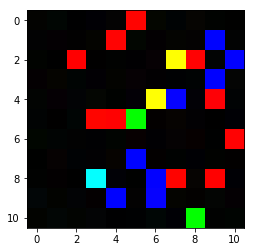

1


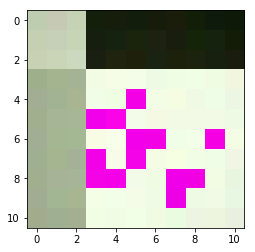

2


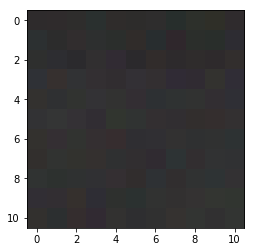

3


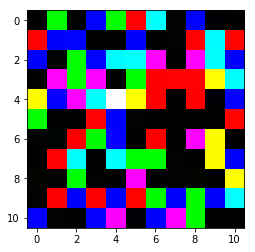

4


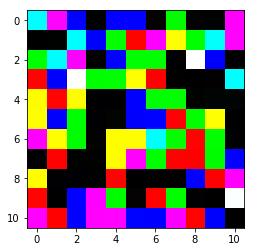

5


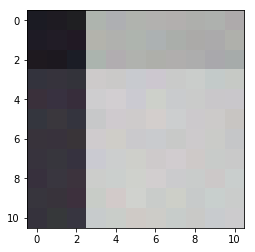

6


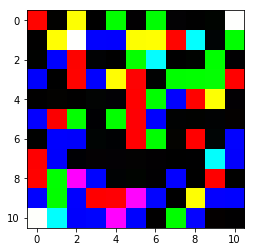

7


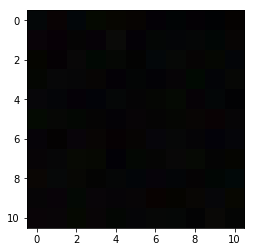

8


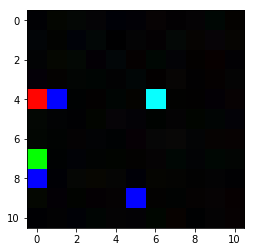

9


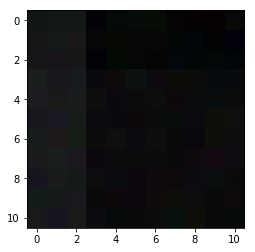

10


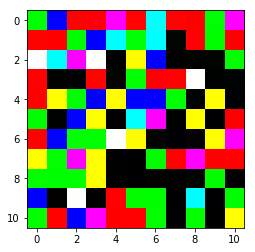

11


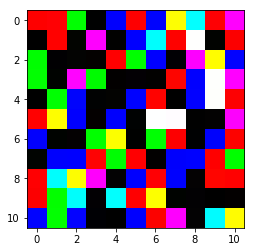

12


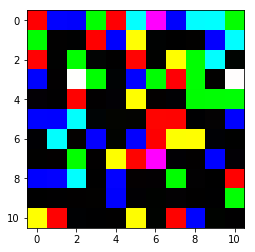

13


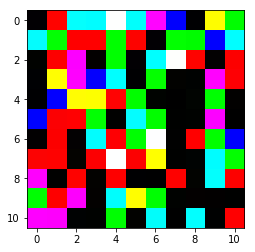

14


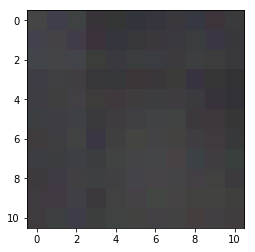

15


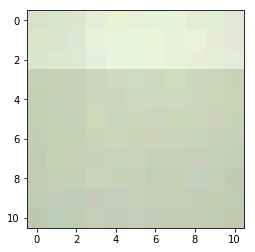

16


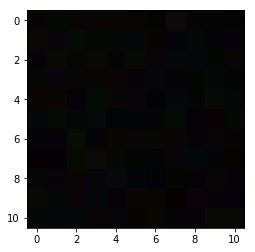

17


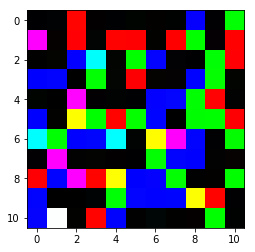

18


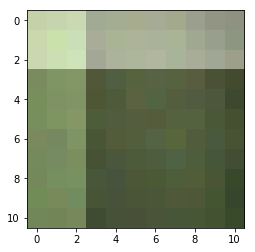

19


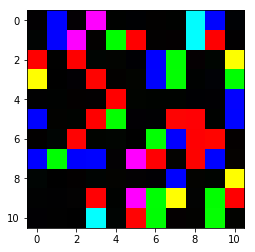

20


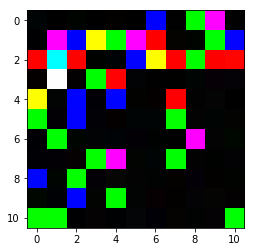

21


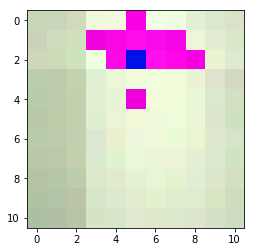

22


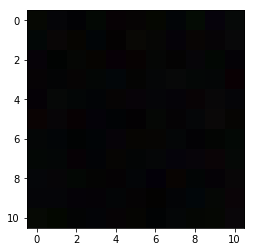

23


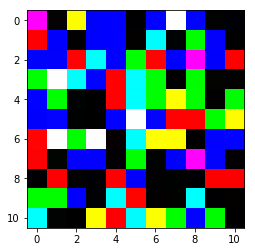

24


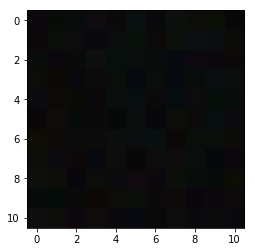

25


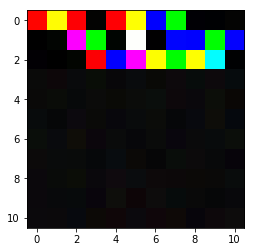

26


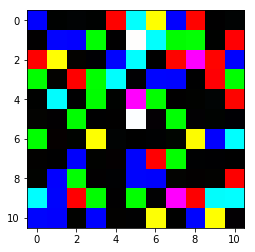

27


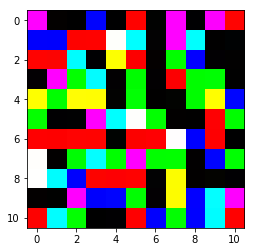

28


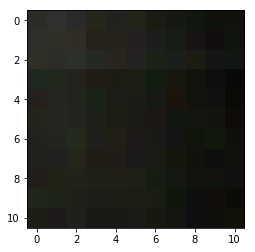

29


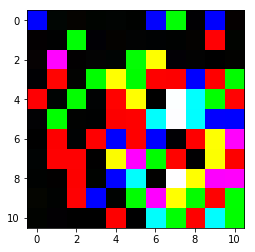

30


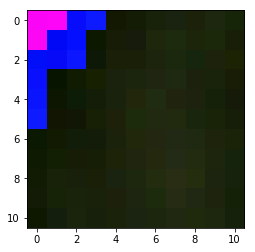

31


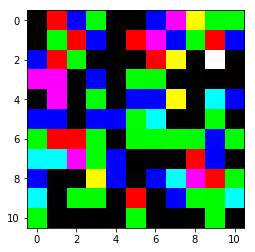

32


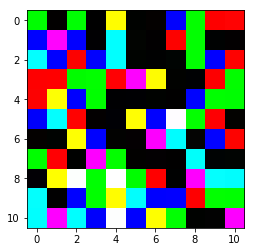

33


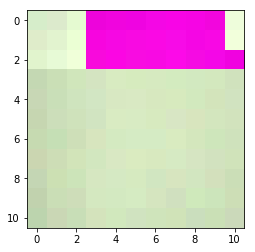

34


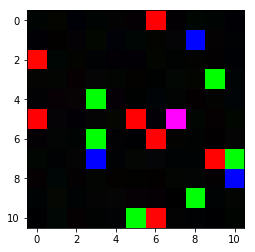

35


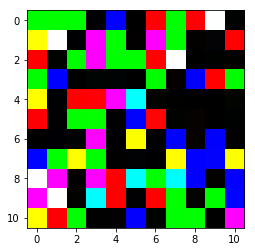

36


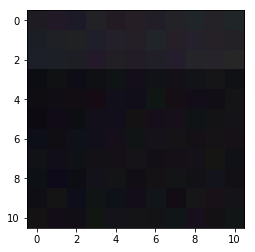

37


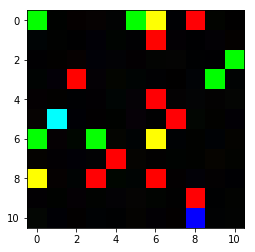

38


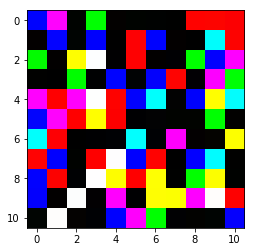

39


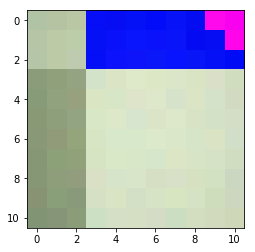

40


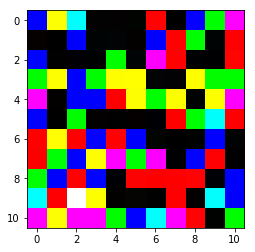

41


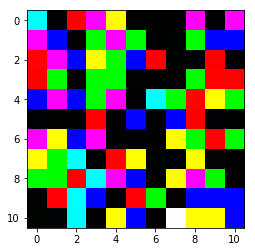

42


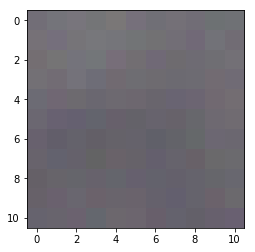

43


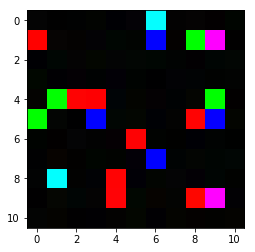

44


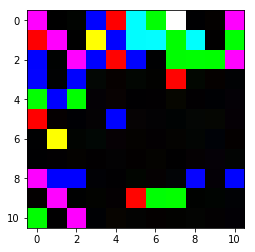

45


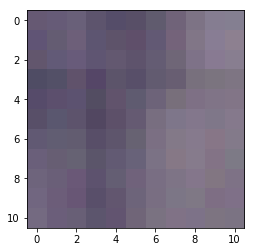

46


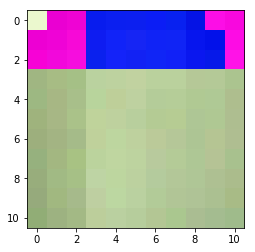

47


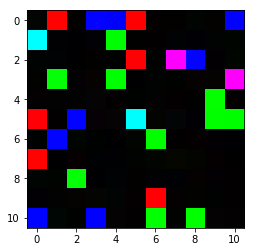

48


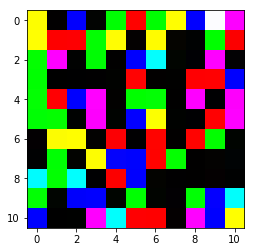

49


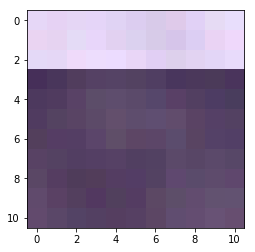

50


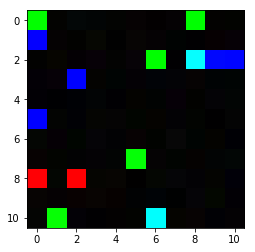

51


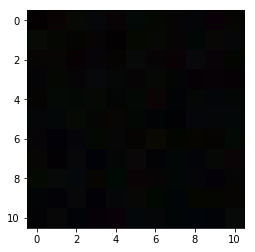

52


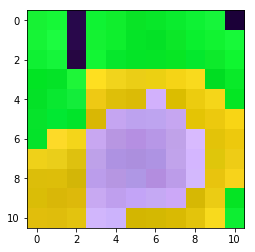

53


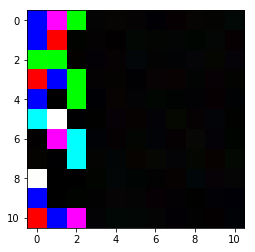

54


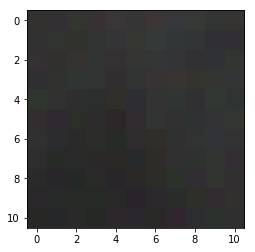

55


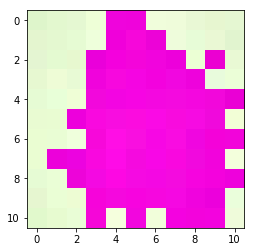

56


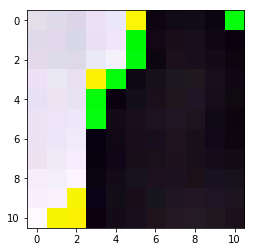

57


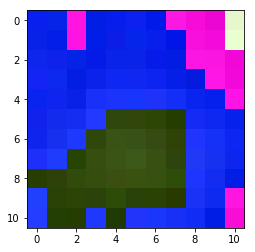

58


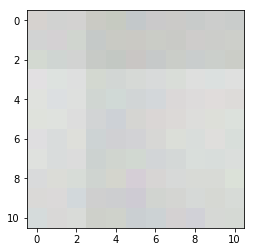

59


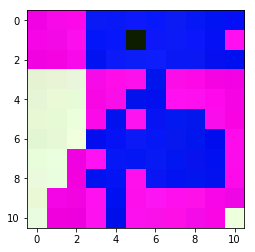

60


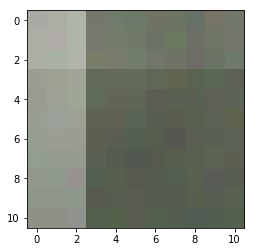

61


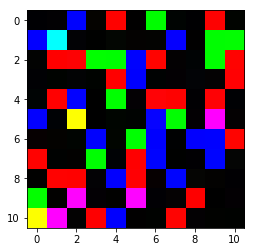

62


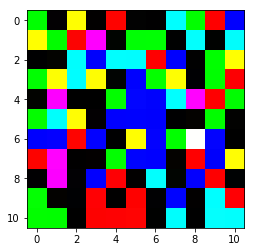

63


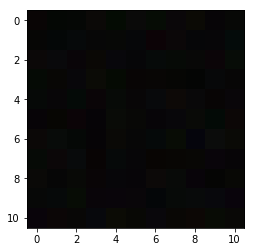

64


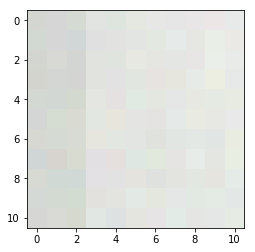

65


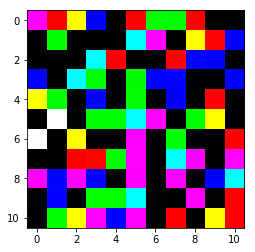

66


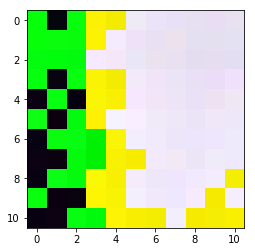

67


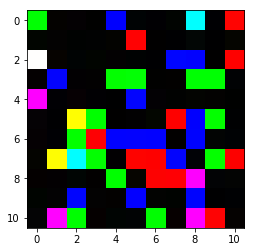

68


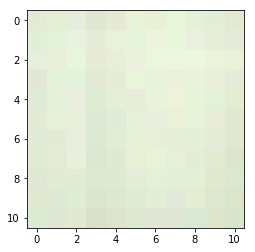

69


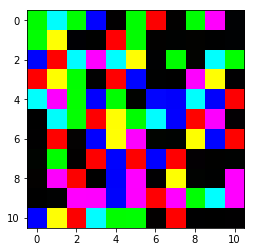

70


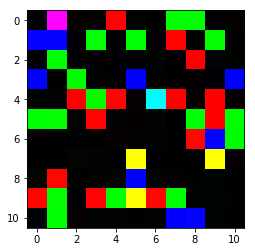

71


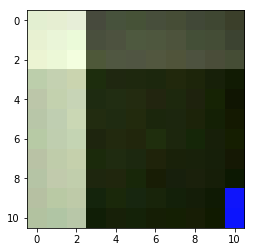

72


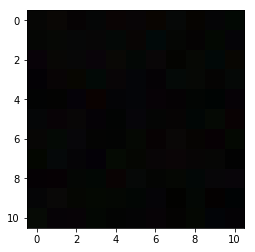

73


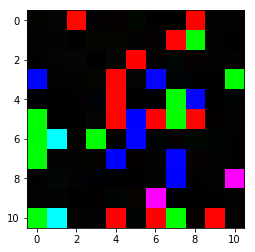

74


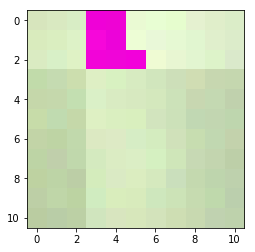

75


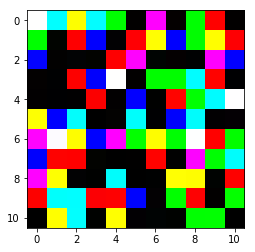

76


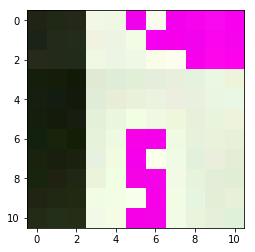

77


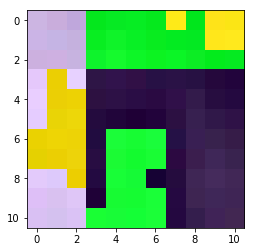

78


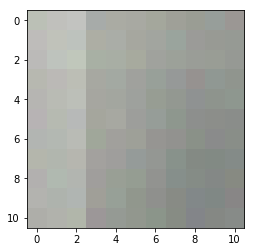

79


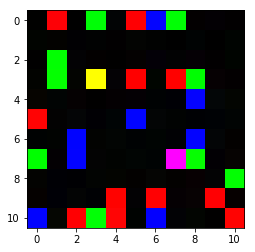

80


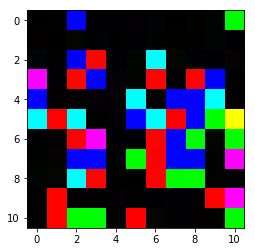

81


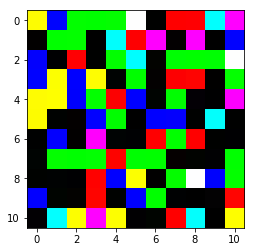

82


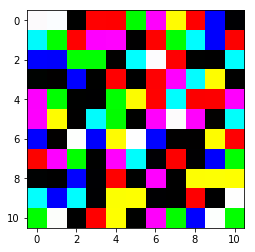

83


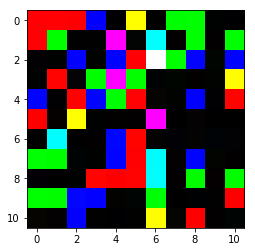

84


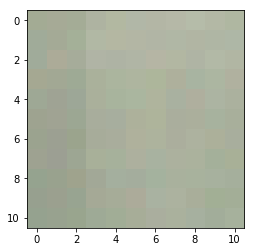

85


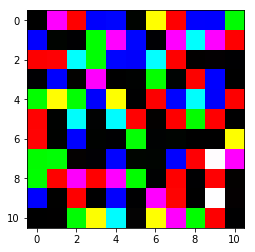

86


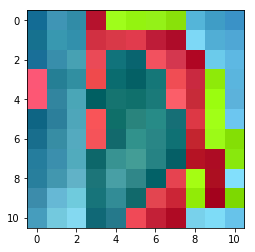

87


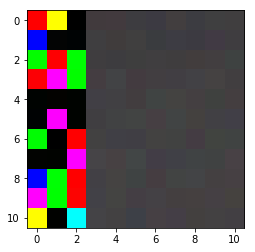

88


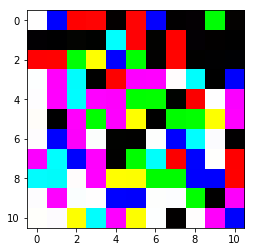

89


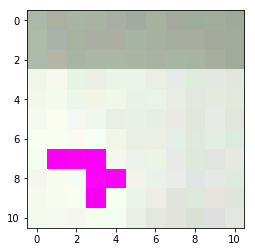

90


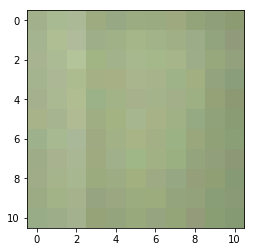

91


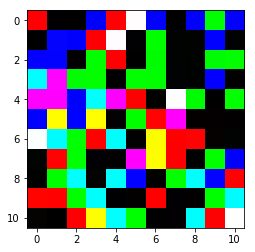

92


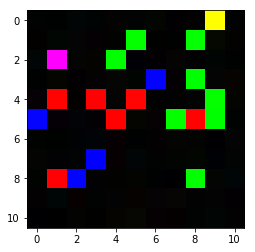

93


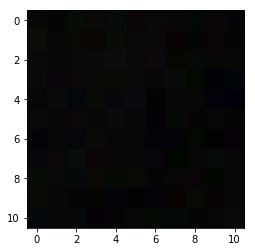

94


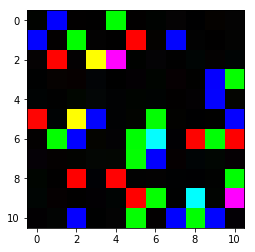

95


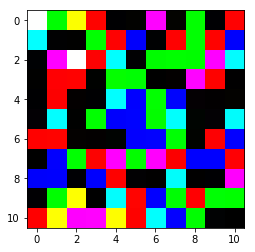

In [20]:
for i in range(W.shape[3]) :
    print(i)
    plt.imshow(W[:,:,:,i])
    plt.show()